In [1]:
import numpy as np
import pandas as pd
from numpy import pi

import matplotlib.pyplot as plt
from scipy.stats import norm as scp_normal_distribution 
%matplotlib inline

import qat.lang.AQASM as qlm

from qat.qpus import LinAlg
# from qat.qlmaas import QLMaaSConnection
# conn = QLMaaSConnection(hostname="10.120.6.44")
# conn.create_config() 
# from qlmaas.qpus import LinAlg
import qat.core.console as console
from qat.core import Result

from copy import copy, deepcopy
import  sys

sys.path.append("../libraries/")
from data_loading import *
from data_extracting import *
from utils import *



In [2]:
def draw(routine):
    program = qlm.Program()
    quantum_register = program.qalloc(routine.arity)
    program.apply(routine,quantum_register)
    global circuit
    circuit = program.to_circ()
    %qatdisplay circuit --depth 1
    del circuit

 

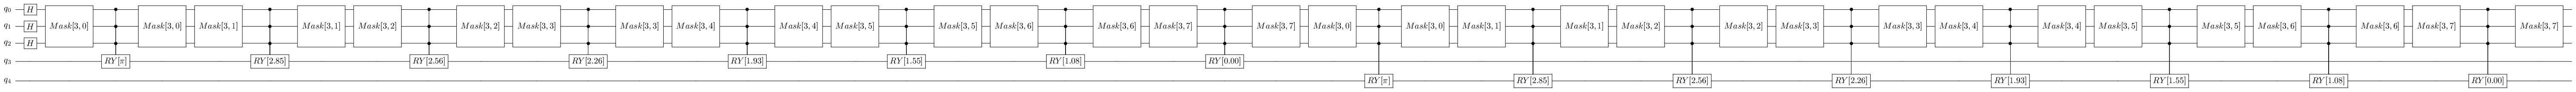

array([ 0.        ,  1.        ,  4.        ,  9.        , 16.        ,
       25.        , 36.        , 49.        ,  0.        ,  6.92820323,
       13.41640786, 18.97366596, 22.97825059, 24.49489743, 21.63330765,
        0.        ,  0.        ,  6.92820323, 13.41640786, 18.97366596,
       22.97825059, 24.49489743, 21.63330765,  0.        , 49.        ,
       48.        , 45.        , 40.        , 33.        , 24.        ,
       13.        ,  0.        ])

In [3]:
number_qubits = 5
f = np.arange(2**(number_qubits-2))
f_normalised = f/np.max(f)
thetas = 2.0*np.arccos(f_normalised)
routine = qlm.QRoutine()
quantum_register = routine.new_wires(number_qubits)
routine.apply(uniform_distribution(number_qubits-2),quantum_register[:number_qubits-2])
routine.apply(load_angles(thetas,"brute_force"),quantum_register[:number_qubits-1])
routine.apply(load_angles(thetas,"brute_force"),[quantum_register[:number_qubits-2],quantum_register[number_qubits-1]])
draw(routine)
np.sqrt(measure_probabilities(routine)*2**(number_qubits-2))*np.max(f)*np.max(f)

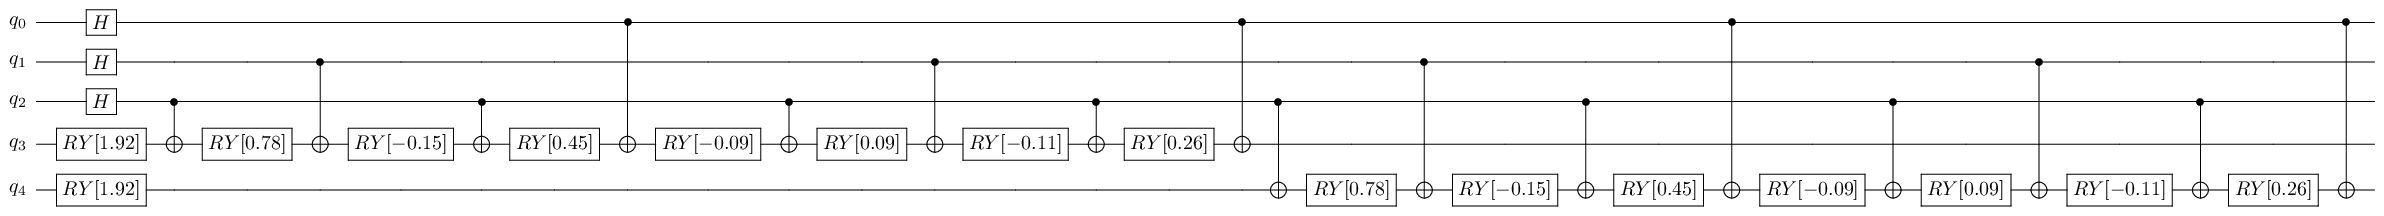

array([ 0.        ,  1.        ,  4.        ,  9.        , 16.        ,
       25.        , 36.        , 49.        ,  0.        ,  6.92820323,
       13.41640786, 18.97366596, 22.97825059, 24.49489743, 21.63330765,
        0.        ,  0.        ,  6.92820323, 13.41640786, 18.97366596,
       22.97825059, 24.49489743, 21.63330765,  0.        , 49.        ,
       48.        , 45.        , 40.        , 33.        , 24.        ,
       13.        ,  0.        ])

In [4]:
number_qubits = 5
f = np.arange(2**(number_qubits-2))
f_normalised = f/np.max(f)
thetas = 2.0*np.arccos(f_normalised)
routine = qlm.QRoutine()
quantum_register = routine.new_wires(number_qubits)
routine.apply(uniform_distribution(number_qubits-2),quantum_register[:number_qubits-2])
routine.apply(multiplexor_RY(thetas),quantum_register[:number_qubits-1])
routine.apply(multiplexor_RY(thetas),[quantum_register[:number_qubits-2],quantum_register[number_qubits-1]])
draw(routine)
np.sqrt(measure_probabilities(routine)*2**(number_qubits-2))*np.max(f)*np.max(f)

Probability classical:  [0.         0.03571429 0.07142857 0.10714286 0.14285714 0.17857143
 0.21428571 0.25      ]
0
1
2


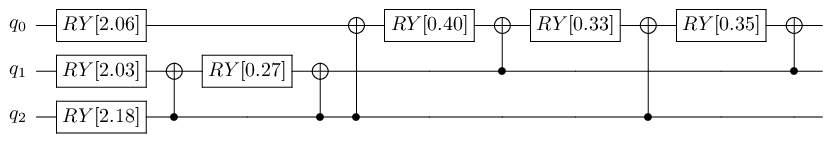

Probability quantum:  [0.         0.03571429 0.07142857 0.10714286 0.14285714 0.17857143
 0.21428571 0.25      ]


In [5]:
number_qubits = 3
probability = np.arange(2**number_qubits)
probability = probability/np.sum(probability)
print("Probability classical: ",probability)
routine = qlm.QRoutine()
quantum_register = routine.new_wires(number_qubits)
routine.apply(load_probability(probability),quantum_register)
draw(routine)
print("Probability quantum: ",measure_probabilities(routine))